In [2]:
#Import required libraries 
import tensorflow
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

In [6]:
data=pd.read_csv("iris.csv")
print(data.describe())
print(data.info())

               Id  sepal-length  sepal-width  petal-length  petal-width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.054000      3.758667     1.198667
std     43.445368      0.828066     0.433594      1.764420     0.763161
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id              150 non-null int64
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), int64(1),

In [7]:
print(data.head(10))
print(data.tail(10))

   Id  sepal-length  sepal-width  petal-length  petal-width        class
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa
5   6           5.4          3.9           1.7          0.4  Iris-setosa
6   7           4.6          3.4           1.4          0.3  Iris-setosa
7   8           5.0          3.4           1.5          0.2  Iris-setosa
8   9           4.4          2.9           1.4          0.2  Iris-setosa
9  10           4.9          3.1           1.5          0.1  Iris-setosa
      Id  sepal-length  sepal-width  petal-length  petal-width           class
140  141           6.7          3.1           5.6          2.4  Iris-virginica
141  142           6.9          3.1    

In [8]:
print(data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Text(0.5,1,'SepalLength vs SepalWidth')

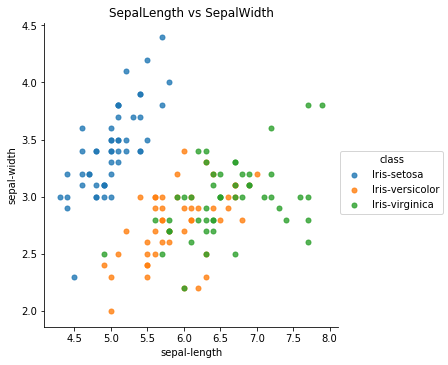

In [20]:
sns.lmplot('sepal-length','sepal-width',  data=data,  fit_reg=False,  hue="class",  scatter_kws={"marker": "A","s": 25})
plt.title('SepalLength vs SepalWidth')

Text(0.5,1,'PetalLengthCm vsPetalWidthCm')

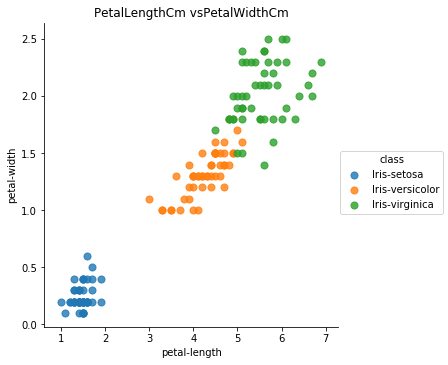

In [23]:
sns.lmplot('petal-length', 'petal-width',
           data=data,
           fit_reg=False,
           hue="class",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLengthCm vsPetalWidthCm',)

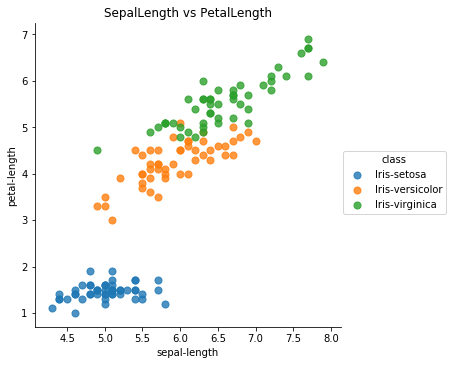

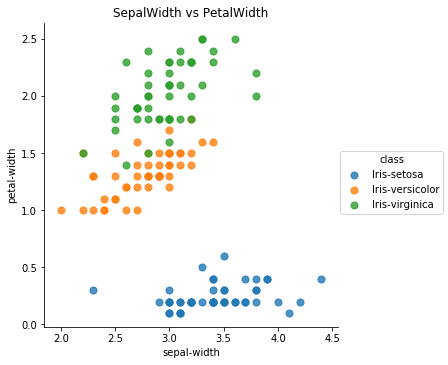

In [25]:
sns.lmplot('sepal-length', 'petal-length',
           data=data,
           fit_reg=False,
           hue="class",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('sepal-width', 'petal-width',
           data=data,
           fit_reg=False,
           hue="class",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [26]:
data.loc[data["class"]=="Iris-setosa","class"]=0
data.loc[data["class"]=="Iris-versicolor","class"]=1
data.loc[data["class"]=="Iris-virginica","class"]=2
print(data.head())

   Id  sepal-length  sepal-width  petal-length  petal-width  class
0   1           5.1          3.5           1.4          0.2      0
1   2           4.9          3.0           1.4          0.2      0
2   3           4.7          3.2           1.3          0.2      0
3   4           4.6          3.1           1.5          0.2      0
4   5           5.0          3.6           1.4          0.2      0


In [27]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      Id  sepal-length  sepal-width  petal-length  petal-width  class
53    54           5.5          2.3           4.0          1.3      1
27    28           5.2          3.5           1.5          0.2      0
63    64           6.1          2.9           4.7          1.4      1
102  103           7.1          3.0           5.9          2.1      2
125  126           7.2          3.2           6.0          1.8      2


In [29]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (150, 4)
Shape of y (150,)


In [33]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])


Examples of X_normalised
 [[0.07609697 0.06088471 0.07870418 0.07476947]
 [0.07194622 0.09265065 0.02951407 0.01150299]
 [0.08439845 0.07676768 0.09247741 0.08052096]]


In [124]:
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [125]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [126]:
#one hot encoding...

y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [171]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [172]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_81 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_82 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_19 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [173]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=40,epochs=10,verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 2s 18ms/step - loss: 1.0952 - acc: 0.4250 - val_loss: 1.0846 - val_acc: 0.6333
Epoch 2/10
120/120 [==============================] - 0s 867us/step - loss: 1.0767 - acc: 0.6583 - val_loss: 1.0608 - val_acc: 0.6333
Epoch 3/10
120/120 [==============================] - 0s 682us/step - loss: 1.0454 - acc: 0.6917 - val_loss: 1.0225 - val_acc: 0.6333
Epoch 4/10
120/120 [==============================] - 0s 731us/step - loss: 0.9991 - acc: 0.6833 - val_loss: 0.9655 - val_acc: 0.6333
Epoch 5/10
120/120 [==============================] - 0s 750us/step - loss: 0.9305 - acc: 0.6750 - val_loss: 0.8896 - val_acc: 0.6333
Epoch 6/10
120/120 [==============================] - 0s 694us/step - loss: 0.8280 - acc: 0.6917 - val_loss: 0.7881 - val_acc: 0.6333
Epoch 7/10
120/120 [==============================] - 0s 793us/step - loss: 0.7343 - acc: 0.7167 - val_loss: 0.6764 - val_acc: 0.7667
Epoch 8/10
120/120

In [174]:
#from sklearn.metrics import accuracy_score
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#print(accuracy_score(prediction,y_test))
acc=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",acc )

Accuracy of the dataset 93.33333333333333


In [179]:
model1=Sequential()
model1.add(Dense(1000,input_dim=4,activation='relu'))
model1.add(Dense(500,activation='softmax'))
model1.add(Dense(300,activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_97 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_98 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_23 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [180]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)

history=model1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_test,y_test), verbose=1,
                    callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 2s 17ms/step - loss: 1.4526 - acc: 0.2917 - val_loss: 1.1541 - val_acc: 0.3333
Epoch 2/100
120/120 [==============================] - 0s 888us/step - loss: 1.3210 - acc: 0.3167 - val_loss: 1.0987 - val_acc: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 844us/step - loss: 1.3481 - acc: 0.3000 - val_loss: 1.1060 - val_acc: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 868us/step - loss: 1.2291 - acc: 0.3500 - val_loss: 1.1018 - val_acc: 0.3667
Epoch 5/100
120/120 [==============================] - 0s 811us/step - loss: 1.3223 - acc: 0.2917 - val_loss: 1.1029 - val_acc: 0.3000
Epoch 6/100
120/120 [==============================] - 0s 906us/step - loss: 1.2505 - acc: 0.3167 - val_loss: 1.1046 - val_acc: 0.3000
Epoch 7/100
120/120 [==============================] - 0s 893us/step - loss: 1.3056 - acc: 0.3167 - val_loss: 1.1089 - val_acc: 0.3000
Epoch 8/100

In [181]:
#accuracy when early stopping is used...
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#print(accuracy_score(prediction,y_test))
acc=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",acc )

Accuracy of the dataset 93.33333333333333
